# 문제 정의 :  
     - 주차 수요 예측 모델
     - 유형별 임대주택 설계 시 단지 내 적정 🅿주차 수요 예측

* Dataset : parking.csv   
             age_gender_info.csv



* DataSet 구성

* parking.csv
    * 단지코드
    * 총세대수
    * 임대건물구분
    * 지역
    * 공급유형
    * 전용면적
    * 전용면적별세대수
    * 공가수
    * 신분
    * 임대료보증금
    * 임대료
    * 도보 10분거리 내 지하철역 수(환승노선 수 반영)
    * 도보 10분거리 내 버스정류장 수
    * 단지내주차면수
    * 등록차량수
    
* age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포지역   
    * 지역
    * 10대미만(여자)
    * 10대미만(남자)
    * 20대(여자)
    * 20대(남자)
    * 30대(여자)
    * 30대(남자)
    * 40대(여자)
    * 40대(남자)
    * 50대(여자)
    * 50대(남자)
    * 60대(여자)
    * 60대(남자)
    * 70대(여자)
    * 70대(남자)
    * 80대(여자)
    * 80대(남자)
    * 90대(여자)
    * 90대(남자)
    * 100대(여자)
    * 100대(남자)


* 아파트 단지 내 필요한 주차대수는  
  ①법정주차대수   
  ②장래주차수요 중 큰 값에 따라 결정하게되어 있어, 정확한   
  ②장래주차수요의 산정을 필요로 합니다.   
  
* 현재 ②장래주차수요는 ‘주차원단위’와 ‘건축연면적’을   
  기초로하여 산출되고 있으며, ‘주차원단위’는 신규 건축예정   
  부지 인근의 유사 단지를 피크 시간대 방문하여 주차된   
  차량대수를 세는 방법으로 조사하고 있습니다.   
  
* 이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제    
  건축시점과의 시간차 등의 문제로 과대 또는 과소 산정의   
  가능성을 배제할 수 없습니다.

## 각종 설치 & 한글 폰트 설정 & 패키지 불러오기

In [3]:
# IPython 매직 명령(주피터 노프북에서 사용)
%matplotlib inline

# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 ) # 한줄에 표현되는 변수 수
pd.set_option( 'display.max_colwidth', 20 ) # 변수 폭
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

#  Windows 사용시 matplotlib 한글 폰트 사용 설정
font_path = "c:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name)

#  Mac OS 사용시 matplotlib 한글 폰트 사용 설정
# rc( 'font', family = 'AppleGothic')

import warnings
warnings.filterwarnings( 'ignore' )

# 1. 데이터 탐색

* DataFrame 생성
* DataFrame 기본 정보 확인

In [5]:
parking = pd.read_csv( 'parking.csv' )
age_gender = pd.read_csv('age_gender_info.csv')

### parking 정보 확인

In [6]:
parking.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [7]:
parking.tail()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2951,C2532,239,아파트,강원도,국민임대,54.95,19,7.0,A,14830000,151030,0.0,1.0,166.0,146.0


In [8]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [9]:
parking.shape

(2952, 15)

In [10]:
parking.dtypes

단지코드                                           object
총세대수                                            int64
임대건물구분                                       object
지역                                               object
공급유형                                           object
전용면적                                          float64
전용면적별세대수                                    int64
공가수                                            float64
자격유형                                           object
임대보증금                                         object
임대료                                             object
도보 10분거리 내 지하철역 수(환승노선 수 반영)    float64
도보 10분거리 내 버스정류장 수                    float64
단지내주차면수                                    float64
등록차량수                                        float64
dtype: object

### 컬럼변수 확인

In [11]:
parking.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적',
       '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

### 컬럼 변수명 변환

In [12]:
# '도보 10분거리 내 지하철역 수(환승노선 수 반영)' , '도보 10분거리 내 버스정류장 수' 길이가 너무 길어서
# 각각 '지하철', '버스' 로 변환park.rename(columns = {'도보 10분거리 내 지하철역 수(환승노선 수 반영)' : '지하철'}, inplace = True)
parking.rename(columns = {'도보 10분거리 내 지하철역 수(환승노선 수 반영)' : '지하철'}, inplace = True)
parking.rename(columns = {'도보 10분거리 내 버스정류장 수' : '버스'}, inplace = True)

In [13]:
parking.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


## 2. 데이터 전처리

### 결측치 확인

In [14]:
parking.isnull().sum()

단지코드              0
총세대수              0
임대건물구분          0
지역                  0
공급유형              0
전용면적              0
전용면적별세대수      0
공가수                0
자격유형              0
임대보증금          569
임대료              569
지하철              211
버스                  4
단지내주차면수        0
등록차량수            0
dtype: int64

* 임대보증금                                        569
* 임대료                                            569
* 도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
* 도보 10분거리 내 버스정류장 수                     4

    결측치가 확인된다.

###  지하철 결측치

In [15]:
parking.loc[parking['지하철'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,A,37474000,519350,NaN,6.0,1636.0,2315.0
2340,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,A,37385000,516130,NaN,6.0,1636.0,2315.0
2341,C1350,1401,아파트,대전광역시,공공임대(분납),51.99,146,2.0,A,54612000,131130,NaN,6.0,1636.0,2315.0
2342,C1350,1401,아파트,대전광역시,공공임대(분납),59.91,32,2.0,A,63585000,152680,NaN,6.0,1636.0,2315.0


In [16]:
print('전체 단지 수: ', parking['단지코드'].nunique())
print('지하철 결측치 단지 수: ', parking.loc[parking['지하철'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', parking.loc[parking['지하철'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', parking.loc[parking['지하철'].isnull()]['지역'].unique())

전체 단지 수:  423
지하철 결측치 단지 수:  20
지하철 결측치 단지:  ['C1312' 'C1874' 'C1424' 'C2100' 'C2520' 'C1616' 'C1704' 'C2258' 'C1068'
 'C1983' 'C2216' 'C2644' 'C1005' 'C1004' 'C1875' 'C2156' 'C1175' 'C2583'
 'C1649' 'C1350']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시' '경상남도']


### 버스 결측치

In [17]:
parking.loc[parking['버스'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0


In [18]:
print('전체 단지 수: ', parking['단지코드'].nunique())
print('버스 결측치 단지 수: ', parking.loc[parking['버스'].isnull()]['단지코드'].nunique())
print('버스 결측치 단지: ', parking.loc[parking['버스'].isnull()]['단지코드'].unique())
print('버스 결측치 단지 지역: ', parking.loc[parking['버스'].isnull()]['지역'].unique())

전체 단지 수:  423
버스 결측치 단지 수:  1
버스 결측치 단지:  ['C1649']
버스 결측치 단지 지역:  ['경상남도']


### 임대보증금

In [19]:
parking[(parking['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


### 임대료

In [20]:
parking[(parking['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [21]:
missing_df = parking.isnull().sum().reset_index()
missing_df.columns = [ 'column', 'count' ]
missing_df

,column,count
0,단지코드,0
1,총세대수,0
2,임대건물구분,0
3,지역,0
4,공급유형,0
5,전용면적,0
6,전용면적별세대수,0
7,공가수,0
8,자격유형,0
9,임대보증금,569


In [22]:
# 결측치가 있는 변수의 전체 데이터에 대한 결측치 비율
missing_df[ 'ratio' ] = missing_df[ 'count' ] / parking.shape[ 0 ]
missing_df.loc[ missing_df[ 'ratio' ] != 0 ]

,column,count,ratio
9,임대보증금,569,0.192751
10,임대료,569,0.192751
11,지하철,211,0.071477
12,버스,4,0.001355


#### 결측치 최빈값 또는 중앙값으로 대체

* 버스 변수 최빈값으로 대체
* 지하철 변수 최빈값으로 대체
* 임대보증금 변수 중앙값으로 대체
* 임대료 변수 중앙값으로 대체

In [23]:
bus_m = parking[ '버스' ].mode()[0]
sub_m = parking[ '지하철' ].mode()[0]


parking["임대보증금"] = parking["임대보증금"].replace(['-'], '')
parking["임대료"] = parking["임대료"].replace(['-'], '')

parking['임대보증금'] = pd.to_numeric(parking.임대보증금, errors='coerce')
parking['임대료'] = pd.to_numeric(parking.임대료, errors='coerce')

dep_m = parking['임대보증금'].median()
len_m = parking['임대료'].median()


print(bus_m)
print(sub_m)
print(dep_m)
print(len_m)

2.0
0.0
20971000.0
161270.0


In [24]:
parking[ '버스' ] = parking[ '버스' ].fillna( bus_m)
parking[ '지하철' ] = parking[ '지하철' ].fillna(sub_m)
parking[ '임대보증금' ] = parking[ '임대보증금' ].fillna(dep_m)
parking[ '임대료' ] = parking[ '임대료' ].fillna(len_m)

In [25]:
parking.isnull().sum()

단지코드            0
총세대수            0
임대건물구분        0
지역                0
공급유형            0
전용면적            0
전용면적별세대수    0
공가수              0
자격유형            0
임대보증금          0
임대료              0
지하철              0
버스                0
단지내주차면수      0
등록차량수          0
dtype: int64

### 중복값 확인

In [26]:
parking.duplicated().sum()

320

In [27]:
parking['임대건물구분'] = parking['임대건물구분'].astype( 'category' )
parking['지역'] = parking['지역'].astype( 'category' )
parking['공급유형'] = parking['공급유형'].astype( 'category' )
parking['자격유형'] = parking['자격유형'].astype( 'category' )

In [28]:
parking.dtypes

단지코드              object
총세대수               int64
임대건물구분        category
지역                category
공급유형            category
전용면적             float64
전용면적별세대수       int64
공가수               float64
자격유형            category
임대보증금           float64
임대료               float64
지하철               float64
버스                 float64
단지내주차면수       float64
등록차량수           float64
dtype: object

In [29]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   단지코드      2952 non-null   object  
 1   총세대수      2952 non-null   int64   
 2   임대건물구분    2952 non-null   category
 3   지역        2952 non-null   category
 4   공급유형      2952 non-null   category
 5   전용면적      2952 non-null   float64 
 6   전용면적별세대수  2952 non-null   int64   
 7   공가수       2952 non-null   float64 
 8   자격유형      2952 non-null   category
 9   임대보증금     2952 non-null   float64 
 10  임대료       2952 non-null   float64 
 11  지하철       2952 non-null   float64 
 12  버스        2952 non-null   float64 
 13  단지내주차면수   2952 non-null   float64 
 14  등록차량수     2952 non-null   float64 
dtypes: category(4), float64(8), int64(2), object(1)
memory usage: 267.2+ KB


### 이상치 확인

In [30]:
parking.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


In [31]:
# 이상치 기준값 제공 함수
#
# 이상치는 중앙값을 크게 벗어난 값( 중앙값 기준 1.5배 넘어가는 값 )
# IQR : 1사분위수와 3사분위수의 차이값
#
# 1사분위수 - ( 1.5 )IQR
# 3사분위수 + ( 1.5 )IQR
def outlier_criteria( x, column ):
    # Q1( 1사분위수 ), Q2( 2사분위수 ) 구하기
    q1 = x[ column ].quantile( 0.25 )
    q3 = x[ column ].quantile( 0.75 )
    
    # 이상치 : 1.5 * IQR( Q3 - Q1 )
    iqr = 1.5 * ( q3 - q1 )
        
    iqr1 = q1 - iqr
    iqr3 = q3 + iqr
    
    return ( iqr1, iqr3 )

# 이상치 대체값 설정 함수
def change_outlier( data, column ):
    x = data.copy()
    
    # 이상치 기준값 계산
    iqr1, iqr3 = outlier_criteria( x, column )
    
    # 이상치 대체값 설정( 최소값, 최대값)
    standard_min = 0
    if iqr1 > 0:
        change_min = iqr1
    standard_max = iqr3
    
    # 이상치 대체
    x.loc[ ( x[ column ] > standard_max ), column ] = standard_max
    x.loc[ ( x[ column ] < standard_min ), column ] = standard_min
    
    return x
    

def print_outlier( x, column ):
    # 이상치 기준값 계산
    iqr1, iqr3 = outlier_criteria( x, column )
    
    print( f'이상치 기준값 : {round( iqr1, 3 )}, {round( iqr3, 3 )}\n' )
    outlier = list ( x[ ( x[ column ] > iqr3 ) | ( x[ column ] < iqr1 ) ][ column ] )
    
    print( f'{column} 변수 이상치\n' )
    print( outlier )
    print( f'\n{column} 변수 이상치 개수 : {len( outlier )}개' )

### 총세대수

In [32]:
parking['총세대수'].describe()

count    2952.000000
mean      886.661247
std       513.540168
min        26.000000
25%       513.500000
50%       779.000000
75%      1106.000000
max      2568.000000
Name: 총세대수, dtype: float64

In [33]:
parking['총세대수'].value_counts()

1755    48
2428    47
1005    41
2424    40
1486    37
        ..
372      2
472      2
1350     2
512      1
136      1
Name: 총세대수, Length: 351, dtype: int64

<AxesSubplot:>

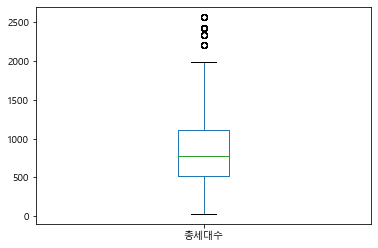

In [34]:
parking['총세대수'].plot( kind = 'box' )

In [35]:
print_outlier( parking, '총세대수' )

이상치 기준값 : -375.25, 1994.75

총세대수 변수 이상치

[2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2428, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2568, 2334, 2334, 2334, 2334, 2334, 2334, 2334, 2334, 2334, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200]

총세대수 변수 이상치 개수 : 122개


* 총세대수 이상치는 이상치가 아니므로 별다른 처리없이 분석에 사용한다.

### 범주형 변수에 대한 정보

#### 임대건물구분

In [36]:
rentbuilding_list = list( parking[ '임대건물구분' ].unique() )

print( '임대건물구분' )
for v in rentbuilding_list:
    print( f'{v}\t' )
print( f'\n임대건물구분 : {len( rentbuilding_list ) }' )

임대건물구분
아파트	
상가	

임대건물구분 : 2


In [37]:
rentbuilding_s = parking[ '임대건물구분' ].value_counts()
#print(rentbuilding_s)
count = parking[ '임대건물구분' ].count()
#print(count)
rentbuildings = list( rentbuilding_s.index )
#print(rentbuildings)
rentbuildings_count = list( rentbuilding_s.values )
#print(rentbuildings_count)


for i in range( len( rentbuildings_count ) ):
    print( f'임대건물구분 : [ {rentbuildings[ i ]} ] - {rentbuildings_count[ i ]}', end = '' )
    print( f'( {rentbuildings_count[ i ] / count * 100:5.2f}% )' )

임대건물구분 : [ 아파트 ] - 2390( 80.96% )
임대건물구분 : [ 상가 ] - 562( 19.04% )


#### label Encoding

In [38]:
pd.get_dummies(parking['임대건물구분'])

,상가,아파트
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2947,0,1
2948,0,1
2949,0,1
2950,0,1


In [39]:
pd.get_dummies(data = parking, columns = ['임대건물구분'], prefix = '임대건물구분')

,단지코드,총세대수,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,임대건물구분_상가,임대건물구분_아파트
0,C2483,900,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0,1
1,C2483,900,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0,1
2,C2483,900,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0,1
3,C2483,900,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0,1
4,C2483,900,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,0,1
2948,C2532,239,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,0,1
2949,C2532,239,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,0,1
2950,C2532,239,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,0,1


In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(parking['임대건물구분'])
labels = encoder.transform(parking['임대건물구분'])

In [41]:
print(labels)

parking['임대건물구분'] = labels

parking['임대건물구분'].dtype

[1 1 1 ... 1 1 1]


dtype('int32')

In [42]:
parking.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,1,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,1,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,1,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,1,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,1,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


### 지역

In [43]:
region_list=list(parking['지역'].unique())

print('지역')
for v in region_list:
    print(f'{v}\t')
    
print(f'\n지역 : {len(region_list)}')

지역
경상북도	
경상남도	
대전광역시	
경기도	
전라북도	
강원도	
광주광역시	
충청남도	
부산광역시	
제주특별자치도	
울산광역시	
충청북도	
전라남도	
대구광역시	
서울특별시	
세종특별자치시	

지역 : 16


In [44]:
region_s = parking[ '지역' ].value_counts()
#print(region_s)
count = parking[ '지역' ].count()
#print(count)
regions = list( region_s.index )
#print(regions)
regions_count = list( region_s.values )
#print(regions_count)


for i in range( len( regions_count ) ):
    print( f'지역 : [ {regions[ i ]} ] - {regions_count[ i ]}명', end = '' )
    print( f'( {regions_count[ i ] / count * 100:5.2f}% )' )

지역 : [ 경기도 ] - 621명( 21.04% )
지역 : [ 경상남도 ] - 369명( 12.50% )
지역 : [ 부산광역시 ] - 328명( 11.11% )
지역 : [ 대전광역시 ] - 266명(  9.01% )
지역 : [ 강원도 ] - 187명(  6.33% )
지역 : [ 충청북도 ] - 163명(  5.52% )
지역 : [ 충청남도 ] - 158명(  5.35% )
지역 : [ 전라남도 ] - 151명(  5.12% )
지역 : [ 광주광역시 ] - 141명(  4.78% )
지역 : [ 경상북도 ] - 119명(  4.03% )
지역 : [ 전라북도 ] - 109명(  3.69% )
지역 : [ 대구광역시 ] - 102명(  3.46% )
지역 : [ 제주특별자치도 ] - 91명(  3.08% )
지역 : [ 서울특별시 ] - 64명(  2.17% )
지역 : [ 세종특별자치시 ] - 47명(  1.59% )
지역 : [ 울산광역시 ] - 36명(  1.22% )


* 지역수가 많아 4개로 나눠 통합.
* 경기도권 : 경기도, 강원도, 서울특별시 : 0
* 전라권 : 전라남도, 광주광역시, 전라북도, 제주특별자치도 :1
* 충청권 : 대전광역시, 충청북도, 충청남도, 세종특별자치시 :2
* 경상권 : 경상남도, 부산광역시, 경상북도, 대구광역시, 울산광역시 : 3

In [45]:
parking['지역'].replace(['경기도', '강원도', '서울특별시'], 0, inplace= True)
parking['지역'].replace(['전라남도', '광주광역시', '전라북도', '제주특별자치도'], 1, inplace= True)
parking['지역'].replace(['대전광역시', '충청북도', '충청남도', '세종특별자치시'], 2, inplace= True)
parking['지역'].replace(['경상남도', '경상북도', '부산광역시', '대구광역시', '울산광역시'], 3, inplace=True)

In [46]:
parking.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,1,3,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,1,3,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,1,3,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,1,3,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,1,3,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


### 공급유형

In [47]:
supply_list=list(parking['공급유형'].unique())

print('공급유형')

for v in supply_list:
    print(f'{v} \t')
    
print(f'\n공급유형 : {len(supply_list)}')

공급유형
국민임대 	
공공임대(50년) 	
영구임대 	
임대상가 	
공공임대(10년) 	
공공임대(분납) 	
장기전세 	
공공분양 	
행복주택 	
공공임대(5년) 	

공급유형 : 10


In [48]:
supply_s= parking['공급유형'].value_counts()

count = parking['공급유형'].count()

supply=list(supply_s.index)
supply_count=list(supply_s.values)

for i in range(len(supply_count)):
    print(f'공급유형 : [{supply[i]:^12}] - {supply_count[i]}명', end=' ')
    print(f'({supply_count[i]/ count * 100:5.2f}%)')

공급유형 : [    국민임대    ] - 1758명 (59.55%)
공급유형 : [    임대상가    ] - 562명 (19.04%)
공급유형 : [    행복주택    ] - 213명 ( 7.22%)
공급유형 : [ 공공임대(10년)  ] - 205명 ( 6.94%)
공급유형 : [    영구임대    ] - 152명 ( 5.15%)
공급유형 : [ 공공임대(50년)  ] - 31명 ( 1.05%)
공급유형 : [  공공임대(분납)  ] - 12명 ( 0.41%)
공급유형 : [    장기전세    ] - 9명 ( 0.30%)
공급유형 : [    공공분양    ] - 7명 ( 0.24%)
공급유형 : [  공공임대(5년)  ] - 3명 ( 0.10%)


In [49]:
parking['공급유형'].replace(['국민임대'], 0, inplace=True)
parking['공급유형'].replace(['임대상가'], 1, inplace= True)
parking['공급유형'].replace(['행복주택'], 2, inplace= True)
parking['공급유형'].replace(['공공임대(10년)'], 3, inplace= True)
parking['공급유형'].replace(['영구임대'], 4, inplace= True)
parking['공급유형'].replace(['공공임대(50년)'], 5, inplace= True)
parking['공급유형'].replace(['공공임대(분납)'], 5, inplace= True)
parking['공급유형'].replace(['장기전세'], 5, inplace= True)
parking['공급유형'].replace(['공공분양'], 5, inplace= True)
parking['공급유형'].replace(['공공임대(5년)'], 5, inplace= True)

### 전용면적

In [50]:
parking['전용면적'].describe()

count    2952.000000
mean       44.757215
std        31.874280
min        12.620000
25%        32.100000
50%        39.930000
75%        51.562500
max       583.400000
Name: 전용면적, dtype: float64

In [51]:
parking['전용면적'].value_counts()

46.90    208
51.93    123
31.84    108
26.37     45
39.72     44
        ... 
32.54      1
39.43      1
36.44      1
23.89      1
59.80      1
Name: 전용면적, Length: 679, dtype: int64

<AxesSubplot:>

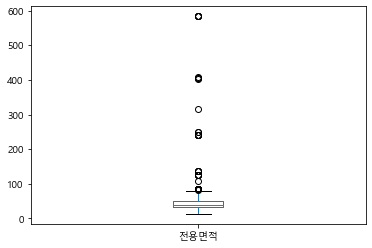

In [52]:
parking['전용면적'].plot( kind = 'box' )

In [53]:
print_outlier( parking, '전용면적' )

이상치 기준값 : 2.906, 80.756

전용면적 변수 이상치

[317.17, 137.49, 109.11, 583.4, 126.65, 240.22, 240.22, 126.65, 583.4, 126.65, 240.22, 240.22, 401.5, 583.4, 248.56, 583.4, 407.97, 583.4, 404.65, 404.65, 137.49, 137.49, 82.92, 248.56, 126.65, 240.22, 240.22, 137.49, 126.65, 84.95, 84.97, 84.99, 84.64, 84.97, 84.98, 84.53, 84.86, 84.83, 84.92, 84.92, 84.92, 84.96, 84.98, 84.72, 84.96, 84.94, 84.96, 84.05, 84.05, 84.39, 84.39, 84.95, 84.95, 84.96, 84.98, 84.83, 84.94, 84.94, 84.96, 84.97, 84.92, 84.97, 84.32, 84.51, 84.58, 84.59, 84.82, 84.82, 84.86, 84.89, 84.91, 84.92, 84.93, 84.93, 84.93, 84.97, 84.97, 84.98, 84.95, 84.94, 84.94, 84.96, 84.99, 84.78, 84.78, 84.9, 84.98, 84.67, 84.67, 84.96, 84.74, 84.9, 84.99, 84.74, 84.9, 84.99, 84.88, 84.88, 84.94, 84.97, 84.98, 84.86, 84.91, 84.98, 84.97, 84.97, 84.98, 84.98]

전용면적 변수 이상치 개수 : 108개


* 별다른 처리없이 사용.

### 전용면적별세대수

In [54]:
parking['전용면적별세대수'].describe()

count    2952.000000
mean      102.747967
std       132.640159
min         1.000000
25%        14.000000
50%        60.000000
75%       144.000000
max      1865.000000
Name: 전용면적별세대수, dtype: float64

In [55]:
parking['전용면적별세대수'].value_counts()

1       562
30       49
60       48
24       47
120      42
       ... 
606       1
616       1
620       1
628       1
1865      1
Name: 전용면적별세대수, Length: 403, dtype: int64

<AxesSubplot:>

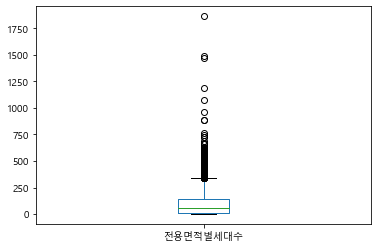

In [56]:
parking['전용면적별세대수'].plot( kind = 'box' )

In [57]:
print_outlier( parking, '전용면적별세대수' )

이상치 기준값 : -181.0, 339.0

전용면적별세대수 변수 이상치

[385, 517, 360, 354, 557, 360, 589, 890, 960, 588, 450, 450, 420, 588, 588, 1865, 478, 358, 478, 358, 447, 596, 745, 1490, 447, 357, 445, 382, 588, 588, 1074, 596, 886, 464, 358, 1192, 596, 1470, 454, 435, 566, 446, 606, 360, 600, 596, 468, 414, 516, 340, 684, 369, 496, 450, 510, 432, 398, 480, 419, 422, 377, 360, 372, 566, 470, 443, 401, 354, 512, 442, 401, 603, 406, 347, 379, 453, 486, 388, 416, 420, 396, 448, 510, 360, 410, 488, 415, 634, 762, 342, 438, 360, 420, 604, 540, 350, 343, 408, 366, 450, 536, 580, 556, 488, 574, 532, 572, 382, 628, 620, 382, 388, 340, 375, 515, 368, 498, 372, 616, 728, 472, 590, 464, 430, 408, 368, 480, 600, 344, 410, 625, 726, 508, 660, 469, 557, 656, 548, 370, 456, 395, 382, 376, 385, 388, 341, 340, 524, 672, 390, 350, 404, 396, 366]

전용면적별세대수 변수 이상치 개수 : 154개


* 별다른 처리 없이 사용.

### 공가수

In [58]:
parking['공가수'].describe()

count    2952.000000
mean       12.921070
std        10.778831
min         0.000000
25%         4.000000
50%        11.000000
75%        20.000000
max        55.000000
Name: 공가수, dtype: float64

In [59]:
parking['공가수'].value_counts()

2.0     254
1.0     245
13.0    237
7.0     232
0.0     124
3.0     110
4.0     107
10.0    106
9.0     104
21.0    104
15.0    100
16.0     96
14.0     84
29.0     81
5.0      78
17.0     70
8.0      58
25.0     56
22.0     54
28.0     52
20.0     48
26.0     47
19.0     47
6.0      44
12.0     40
23.0     37
32.0     35
11.0     34
18.0     32
24.0     31
34.0     24
27.0     20
30.0     19
36.0     18
46.0     14
31.0     13
38.0     13
33.0     12
40.0     11
37.0     11
49.0      9
47.0      8
55.0      8
39.0      8
43.0      5
35.0      4
41.0      4
42.0      4
Name: 공가수, dtype: int64

<AxesSubplot:>

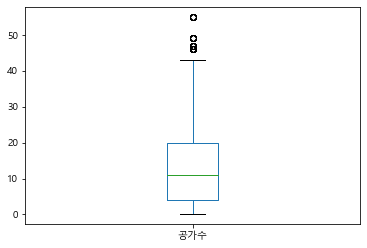

In [60]:
parking['공가수'].plot( kind = 'box' )

In [61]:
print_outlier( parking, '공가수' )

이상치 기준값 : -20.0, 44.0

공가수 변수 이상치

[46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0]

공가수 변수 이상치 개수 : 39개


* 별다른 처리 없이 사용.

### 자격유형

In [62]:
qualified_list=list(parking['자격유형'].unique())

print('자격유형')

for v in qualified_list:
    print(f'{v} \t')
    
print(f'\n자격유형 : {len(qualified_list)}')

자격유형
A 	
B 	
C 	
D 	
E 	
F 	
G 	
H 	
I 	
J 	
K 	
L 	
M 	
N 	
O 	

자격유형 : 15


In [63]:
qualify_s= parking['자격유형'].value_counts()

count = parking['자격유형'].count()

qualify=list(qualify_s.index)
qualify_count=list(qualify_s.values)

for i in range(len(qualify_count)):
    print(f'자격유형 : [{qualify[i]}] - {qualify_count[i]}명', end=' ')
    print(f'({qualify_count[i]/ count * 100:5.2f}%)')

자격유형 : [A] - 1801명 (61.01%)
자격유형 : [D] - 569명 (19.28%)
자격유형 : [H] - 155명 ( 5.25%)
자격유형 : [J] - 114명 ( 3.86%)
자격유형 : [C] - 95명 ( 3.22%)
자격유형 : [I] - 49명 ( 1.66%)
자격유형 : [E] - 37명 ( 1.25%)
자격유형 : [K] - 33명 ( 1.12%)
자격유형 : [L] - 33명 ( 1.12%)
자격유형 : [N] - 30명 ( 1.02%)
자격유형 : [B] - 21명 ( 0.71%)
자격유형 : [G] - 9명 ( 0.30%)
자격유형 : [F] - 3명 ( 0.10%)
자격유형 : [M] - 2명 ( 0.07%)
자격유형 : [O] - 1명 ( 0.03%)


* 공급유형에 포함된 내용이라 계산할 때 제외

In [64]:
parking.drop('자격유형', axis=1, inplace=True)

### 임대보증금

In [65]:
parking['임대보증금'].describe()

count    2.952000e+03
mean     2.570442e+07
std      1.951096e+07
min      3.056000e+06
25%      1.595175e+07
50%      2.097100e+07
75%      2.820275e+07
max      2.164230e+08
Name: 임대보증금, dtype: float64

In [66]:
parking['임대보증금'].value_counts()

20971000.0    583
24775000.0     22
14418000.0     21
5787000.0      18
43000000.0     17
             ... 
25966000.0      1
11370000.0      1
20800000.0      1
18557000.0      1
24837000.0      1
Name: 임대보증금, Length: 956, dtype: int64

<AxesSubplot:>

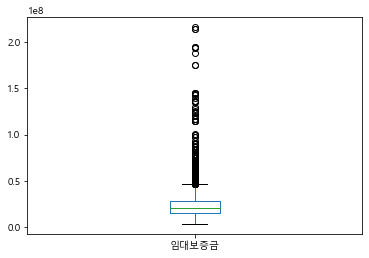

In [67]:
parking['임대보증금'].plot( kind = 'box' )

In [68]:
print_outlier( parking, '임대보증금' )

이상치 기준값 : -2424750.0, 46579250.0

임대보증금 변수 이상치

[49854000.0, 49854000.0, 49854000.0, 54040000.0, 55413000.0, 76506000.0, 76506000.0, 55558000.0, 55558000.0, 61674000.0, 78080000.0, 78080000.0, 78080000.0, 78080000.0, 56985000.0, 56985000.0, 50791000.0, 50791000.0, 51658000.0, 58053000.0, 58053000.0, 65856600.0, 65856600.0, 65856600.0, 81223800.0, 81223800.0, 61224000.0, 61224000.0, 61224000.0, 61224000.0, 61224000.0, 83286000.0, 83286000.0, 83286000.0, 83286000.0, 83286000.0, 54494000.0, 76089000.0, 93486000.0, 50220000.0, 50220000.0, 55540000.0, 55540000.0, 50758000.0, 63166000.0, 125326000.0, 143545000.0, 145264000.0, 142744000.0, 48844000.0, 48844000.0, 48844000.0, 58132000.0, 123711000.0, 123711000.0, 123711000.0, 123711000.0, 144496000.0, 144496000.0, 194080000.0, 78957000.0, 90237000.0, 90237000.0, 90237000.0, 87444000.0, 174888000.0, 174888000.0, 194562000.0, 194562000.0, 216423000.0, 50775000.0, 50775000.0, 187694000.0, 213863000.0, 213863000.0, 65421000.0, 97005000.0, 99261000

* 별다른 처리 없이 사용.

### 임대료

In [69]:
parking['임대료'].describe()

count    2.952000e+03
mean     1.888331e+05
std      1.174265e+05
min      1.665000e+04
25%      1.222100e+05
50%      1.612700e+05
75%      2.100350e+05
max      1.058030e+06
Name: 임대료, dtype: float64

In [70]:
parking['임대료'].value_counts()

161270.0    590
390000.0     19
79980.0      18
100920.0     16
167230.0     15
           ... 
268730.0      1
104000.0      1
65080.0       1
222580.0      1
208470.0      1
Name: 임대료, Length: 995, dtype: int64

<AxesSubplot:>

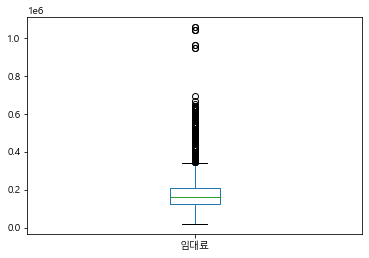

In [71]:
parking['임대료'].plot( kind = 'box' )

In [72]:
print_outlier( parking, '임대료' )

이상치 기준값 : -9527.5, 341772.5

임대료 변수 이상치

[348700.0, 348700.0, 370790.0, 346850.0, 346850.0, 345330.0, 357050.0, 357050.0, 373340.0, 373340.0, 373340.0, 373340.0, 373340.0, 371160.0, 379510.0, 379510.0, 368040.0, 419640.0, 419640.0, 620370.0, 665490.0, 363840.0, 368190.0, 361800.0, 395560.0, 370650.0, 370650.0, 530130.0, 597820.0, 597820.0, 597820.0, 368980.0, 368980.0, 368980.0, 368980.0, 422950.0, 422950.0, 360950.0, 360950.0, 373500.0, 373500.0, 373500.0, 373500.0, 356420.0, 356420.0, 378000.0, 378000.0, 409500.0, 409500.0, 651960.0, 945230.0, 962150.0, 945230.0, 962150.0, 1042230.0, 1042230.0, 1058030.0, 1042230.0, 1058030.0, 390000.0, 416000.0, 416000.0, 550000.0, 580000.0, 450000.0, 450000.0, 535000.0, 590000.0, 590000.0, 535000.0, 590000.0, 590000.0, 602270.0, 602270.0, 695170.0, 603480.0, 603480.0, 636400.0, 349460.0, 456000.0, 462000.0, 462000.0, 462000.0, 455600.0, 509410.0, 510510.0, 510510.0, 512110.0, 495000.0, 495000.0, 495000.0, 495000.0, 520000.0, 520000.0, 550000.0, 408

* 별다른 처리 없이 사용.

### 도보 10분 거리내 지하주차장 수 

In [73]:
parking['지하철'].describe()

count    2952.000000
mean        0.163957
std         0.414350
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: 지하철, dtype: float64

In [74]:
parking['지하철'].value_counts()

0.0    2513
1.0     400
2.0      33
3.0       6
Name: 지하철, dtype: int64

<AxesSubplot:>

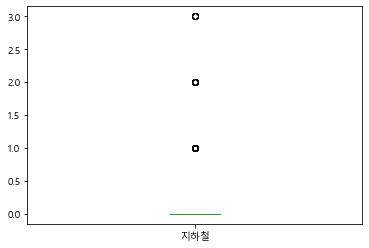

In [75]:
parking['지하철'].plot( kind = 'box' )

In [76]:
print_outlier( parking, '지하철' )

이상치 기준값 : 0.0, 0.0

지하철 변수 이상치

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

* 별다른 처리 없이 사용.

### 도보 10분거리 내 버스정류장 수

In [77]:
parking['버스'].describe()

count    2952.000000
mean        3.693428
std         2.643608
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: 버스, dtype: float64

In [78]:
parking['버스'].value_counts()

2.0     784
3.0     776
4.0     493
1.0     270
5.0     164
6.0     156
8.0      99
10.0     80
7.0      65
12.0     22
20.0     15
15.0     11
16.0      6
19.0      4
11.0      3
14.0      2
0.0       2
Name: 버스, dtype: int64

<AxesSubplot:>

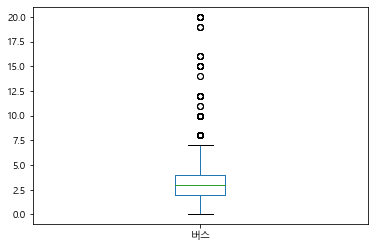

In [79]:
parking['버스'].plot( kind = 'box' )

In [80]:
print_outlier( parking, '버스' )

이상치 기준값 : -1.0, 7.0

버스 변수 이상치

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 14.0, 14.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 10.0, 10.0, 10.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 11.0, 11.0, 11.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 12.0, 12.0, 12.0, 12.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 10.0, 10.0, 10.0,

* 별다른 처리 없이 사용.

### 단지내주차면수

In [81]:
parking['단지내주차면수'].describe()

count    2952.000000
mean      601.668360
std       396.407072
min        13.000000
25%       279.250000
50%       517.000000
75%       823.000000
max      1798.000000
Name: 단지내주차면수, dtype: float64

In [82]:
parking['단지내주차면수'].value_counts()

166.0    71
270.0    52
756.0    47
405.0    42
487.0    40
         ..
380.0     2
205.0     2
420.0     1
30.0      1
136.0     1
Name: 단지내주차면수, Length: 355, dtype: int64

<AxesSubplot:>

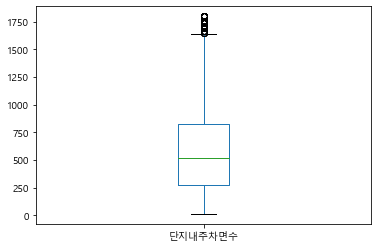

In [83]:
parking['단지내주차면수'].plot( kind = 'box' )

In [84]:
print_outlier( parking, '단지내주차면수' )

이상치 기준값 : -536.375, 1638.625

단지내주차면수 변수 이상치

[1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1756.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1741.0, 1689.0, 1689.0, 1689.0, 1689.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1798.0, 1648.0, 1648.0, 1648.0, 1648.0, 1670.0, 1670.0, 1670.0, 1670.0, 1670.0, 1713.0, 1713.0, 1713.0, 1713.0, 1713.0, 1713.0, 1713.0, 1713.0, 1713.0]

단지내주차면수 변수 이상치 개수 : 66개


* 별다른 처리 없이 사용.

In [85]:
parking.describe()

,총세대수,임대건물구분,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2.952000e+03,2.952000e+03,2952.000000,2952.000000,2952.000000,2952.000000
mean,886.661247,0.809621,44.757215,102.747967,12.921070,2.570442e+07,1.888331e+05,0.163957,3.693428,601.668360,559.768293
std,513.540168,0.392667,31.874280,132.640159,10.778831,1.951096e+07,1.174265e+05,0.414350,2.643608,396.407072,433.375027
min,26.000000,0.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,513.500000,1.000000,32.100000,14.000000,4.000000,1.595175e+07,1.222100e+05,0.000000,2.000000,279.250000,220.000000
50%,779.000000,1.000000,39.930000,60.000000,11.000000,2.097100e+07,1.612700e+05,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,1.000000,51.562500,144.000000,20.000000,2.820275e+07,2.100350e+05,0.000000,4.000000,823.000000,770.000000
max,2568.000000,1.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


## 시각화

<AxesSubplot:xlabel='총세대수', ylabel='Density'>

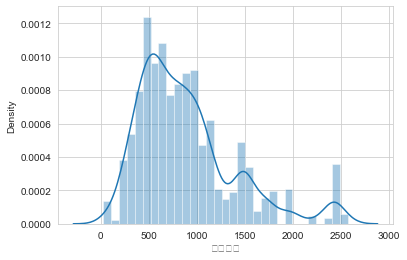

In [86]:
sns.set_style( 'whitegrid' )
sns.distplot( parking[ '총세대수' ] )

In [87]:
parking.corr()

,총세대수,임대건물구분,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
총세대수,1.000000,-0.340668,0.042271,0.098205,0.068192,0.014346,0.034093,0.209509,-0.000918,0.501488,0.316703
임대건물구분,-0.340668,1.000000,-0.009347,0.372043,0.242644,0.117663,0.113843,-0.162156,0.009698,0.408489,0.449189
전용면적,0.042271,-0.009347,1.000000,-0.035479,-0.089201,0.178648,0.269700,-0.011591,-0.008885,0.071260,0.115453
전용면적별세대수,0.098205,0.372043,-0.035479,1.000000,0.166472,-0.047930,-0.010951,-0.047729,0.046813,0.281989,0.247085
공가수,0.068192,0.242644,-0.089201,0.166472,1.000000,0.054511,-0.140350,-0.076314,0.043104,0.289819,0.118121
임대보증금,0.014346,0.117663,0.178648,-0.047930,0.054511,1.000000,0.493895,0.007877,0.099933,0.281147,0.317374
임대료,0.034093,0.113843,0.269700,-0.010951,-0.140350,0.493895,1.000000,0.045030,0.039016,0.284571,0.402527
지하철,0.209509,-0.162156,-0.011591,-0.047729,-0.076314,0.007877,0.045030,1.000000,0.089523,-0.037040,-0.086562
버스,-0.000918,0.009698,-0.008885,0.046813,0.043104,0.099933,0.039016,0.089523,1.000000,0.069592,0.103098
단지내주차면수,0.501488,0.408489,0.071260,0.281989,0.289819,0.281147,0.284571,-0.037040,0.069592,1.000000,0.859216


<AxesSubplot:>

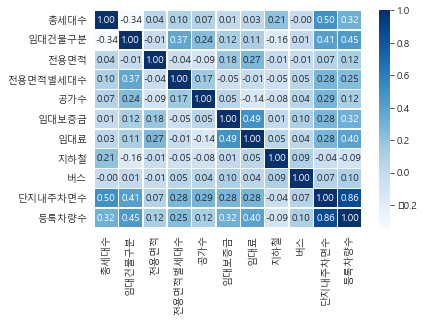

In [ ]:
from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


sns.heatmap( data = parking.corr(), annot = True,
             fmt = '.2f', linewidths = .5, cmap = 'Blues' )

* 단지내주차면수와 등록차량수가 양의 상관계수가 높다.
* 임대료와 등록차량수는 약한 양의 상관계수가 있다.

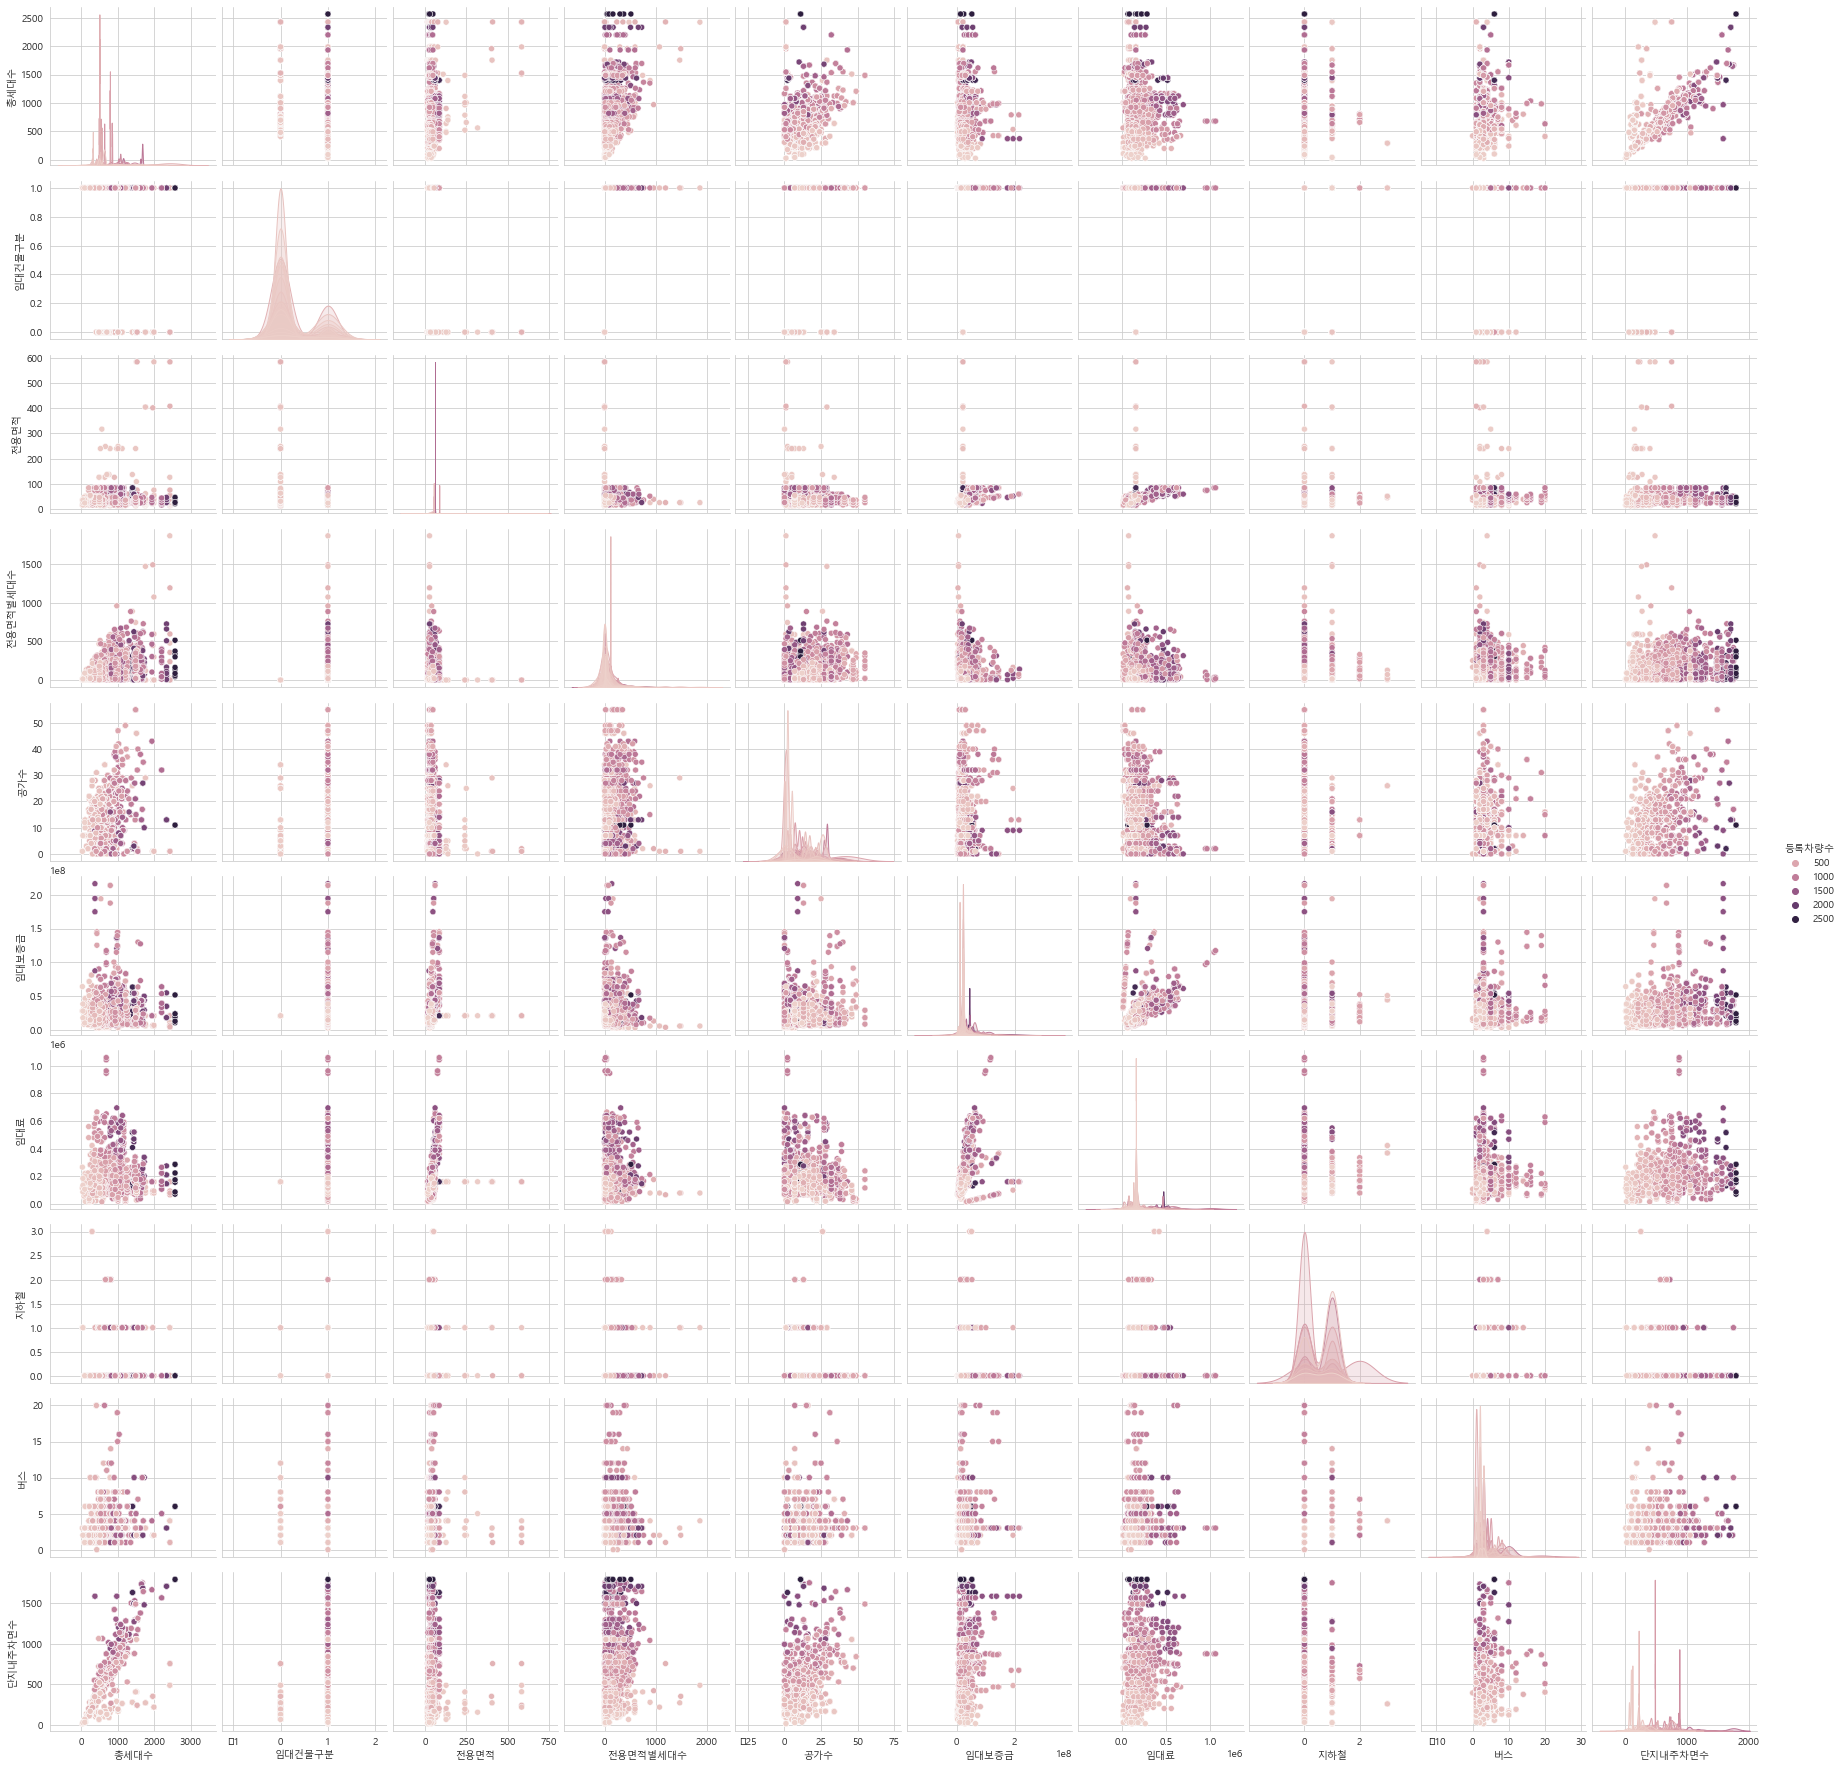

In [85]:
sns.pairplot( parking, hue = '등록차량수' )

## 주차대수 예측 모델

#### 입력 / 정답 데이터 분리

In [86]:
# 가장 상관계수가 높은 변수 하나만 가지고 먼저 평가해봄. 

X = np.asarray( parking[ '단지내주차면수' ]).reshape(-1, 1)
y = np.asarray( parking['등록차량수'])

In [87]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (2952, 1)
y shape : (2952,)


#### 학습용 / 테스트용 데이터 분리

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
        test_size = 0.2, random_state = 1234 )

In [90]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (2361, 1)
y_train shape : (2361,)

X_test shape : (591, 1)
y_test shape : (591,)


#### 입력 데이터 표준화 (StandardScaler)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

In [93]:
print( f'X_train_scaled mean : {X_train_scaled.mean()}' )
print( f'X_train_scaled std : {X_train_scaled.std()}' )
print( f'\nX_test_scaled mean : {X_test_scaled.mean()}' )
print( f'X_test_scaled std : {X_test_scaled.std()}' )

X_train_scaled mean : -6.056616923833976e-17
X_train_scaled std : 0.9999999999999999

X_test_scaled mean : -0.04043819234282581
X_test_scaled std : 1.0005114138383067


#### 다중 선형 회귀 모델 생성

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()
model.fit( X_train_scaled, y_train )

LinearRegression()

#### 모델 평가

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
y_predict = model.predict( X_test_scaled )

In [98]:
print( f'다중 선형 회귀 모델 결정 계수 : {model.score( X_test_scaled, y_test ) }' )
print( f'\n다중 선형 회귀 모델 W( Weight )값 : {model.coef_}' )
print( f'다중 선형 회귀 모델 b( bias ) 값 : {model.intercept_}' )

다중 선형 회귀 모델 결정 계수 : 0.7294831001621657

다중 선형 회귀 모델 W( Weight )값 : [371.44829823]
다중 선형 회귀 모델 b( bias ) 값 : 562.2511647606946


In [99]:
mae = mean_absolute_error( y_test, y_predict )
mse = mean_squared_error( y_test, y_predict )
rmse = np.sqrt( mse )
r2 = r2_score( y_test, y_predict )

In [100]:
print( f'MAE  : {mae:8.5f}' )
print( f'MSE  : {mse:8.5f}' )
print( f'RMSE : {rmse:8.5f}' )
print( f'R^2  : {r2:8.5f}' )

MAE  : 158.93914
MSE  : 52290.97972
RMSE : 228.67221
R^2  :  0.72948


In [101]:
nmae = np.mean( abs( y_predict - y_test ) / y_test ) # nmae 계산

print( f'모델 NMAE: {nmae}' ) # 예측치와 실제값의 오차율

모델 NMAE: 0.46304121856239655


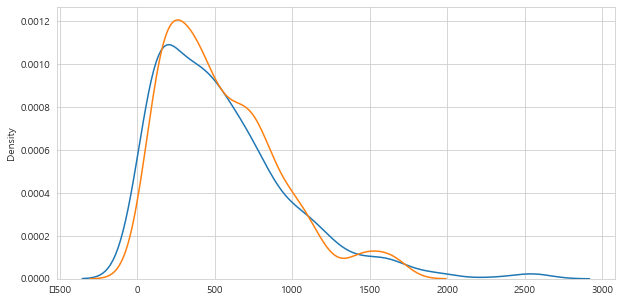

In [102]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )
plt.show()

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)

In [105]:
print(f'원본 입력 데이터 shape: {X_train_scaled.shape}')
print(f'2차항 변환 데이터 shape : {X_train_poly.shape}')

원본 입력 데이터 shape: (2361, 1)
2차항 변환 데이터 shape : (2361, 3)


In [106]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [107]:
X_test_poly = poly.fit_transform(X_test_scaled)
r_square = model.score(X_test_poly, y_test)
print(f'결정계수(R-제곱) : {r_square}')

결정계수(R-제곱) : 0.7300794045280112


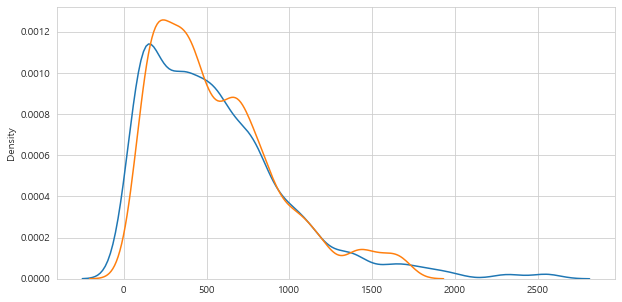

In [108]:
X_scaled= scaler.transform(X)
X_poly = poly.fit_transform(X_scaled)
y_hat = model.predict(X_poly)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist =False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label = 'y_hat', ax=ax1)
plt.show()

### 주차대수 예측 모델

#### 입력/정답 데이터 분리

In [109]:
X = np.asarray( parking[['단지내주차면수', '임대료']])
y = np.asarray( parking['등록차량수'] )

In [110]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (2952, 2)
y shape : (2952,)


#### 학습용/테스트용 데이터 분리

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
        test_size = 0.2, random_state = 1234 )

In [113]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (2361, 2)
y_train shape : (2361,)

X_test shape : (591, 2)
y_test shape : (591,)


#### 입력 데이터 표준화( StandardScaler )

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

In [116]:
print( f'X_train_scaled mean : {X_train_scaled.mean()}' )
print( f'X_train_scaled std : {X_train_scaled.std()}' )
print( f'\nX_test_scaled mean : {X_test_scaled.mean()}' )
print( f'X_test_scaled std : {X_test_scaled.std()}' )

X_train_scaled mean : -4.5142486388824664e-18
X_train_scaled std : 0.9999999999999997

X_test_scaled mean : -0.025070111570985886
X_test_scaled std : 0.9953940284898367


#### 다중 선형 회귀 모델 생성

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
model = LinearRegression()
model.fit( X_train_scaled, y_train )

LinearRegression()

#### 모델 평가

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
y_predict = model.predict( X_test_scaled )

In [121]:
print( f'다중 선형 회귀 모델 결정 계수 : {model.score( X_test_scaled, y_test ) }' )
print( f'\n다중 선형 회귀 모델 W( Weight )값 : {model.coef_}' )
print( f'다중 선형 회귀 모델 b( bias ) 값 : {model.intercept_}' )

다중 선형 회귀 모델 결정 계수 : 0.7567311275345378

다중 선형 회귀 모델 W( Weight )값 : [350.70015526  74.09672996]
다중 선형 회귀 모델 b( bias ) 값 : 562.2511647606946


In [122]:
mae = mean_absolute_error( y_test, y_predict )
mse = mean_squared_error( y_test, y_predict )
rmse = np.sqrt( mse )
r2 = r2_score( y_test, y_predict )

In [123]:
print( f'MAE  : {mae:8.5f}' )
print( f'MSE  : {mse:8.5f}' )
print( f'RMSE : {rmse:8.5f}' )
print( f'R^2  : {r2:8.5f}' )

MAE  : 153.07323
MSE  : 47023.92969
RMSE : 216.85002
R^2  :  0.75673


In [124]:
nmae = np.mean( abs( y_predict - y_test ) / y_test ) # nmae 계산

print( f'모델 NMAE: {nmae}' ) # 예측치와 실제값의 오차율

모델 NMAE: 0.46367941101399124


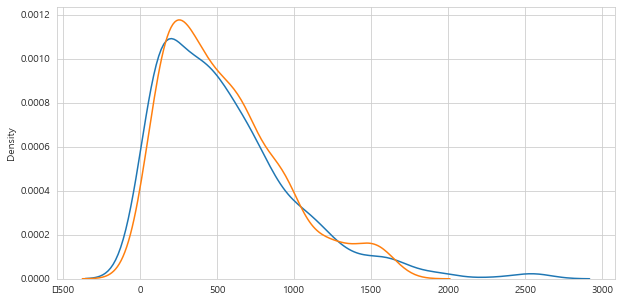

In [125]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )
plt.show()

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)

In [128]:
print(f'원본 입력 데이터 shape: {X_train_scaled.shape}')
print(f'2차항 변환 데이터 shape : {X_train_poly.shape}')

원본 입력 데이터 shape: (2361, 2)
2차항 변환 데이터 shape : (2361, 6)


In [129]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [130]:
X_test_poly = poly.fit_transform(X_test_scaled)
r_square = model.score(X_test_poly, y_test)
print(f'결정계수(R-제곱) : {r_square}')

결정계수(R-제곱) : 0.7608451306726731


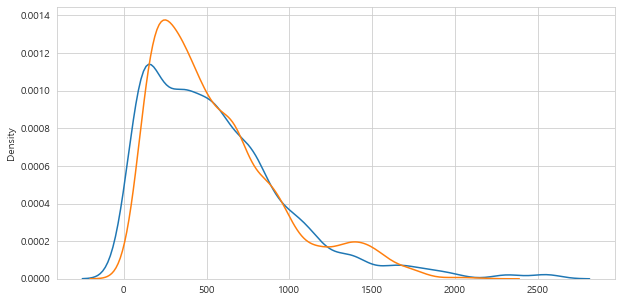

In [131]:
X_scaled= scaler.transform(X)
X_poly = poly.fit_transform(X_scaled)
y_hat = model.predict(X_poly)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist =False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label = 'y_hat', ax=ax1)
plt.show()

### 주차대수 예측 모델 - 실수형 변수들만 모음

#### 입력/정답 데이터 분리

In [132]:
X = np.asarray( parking[['총세대수','전용면적','전용면적별세대수','공가수','임대보증금','임대료','지하철','버스','단지내주차면수' ]])
y = np.asarray(parking[['등록차량수']])

In [133]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (2952, 9)
y shape : (2952, 1)


#### 학습용/테스트용 데이터 분리

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
        test_size = 0.2, random_state = 1234 )

In [136]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (2361, 9)
y_train shape : (2361, 1)

X_test shape : (591, 9)
y_test shape : (591, 1)


#### 입력 데이터 표준화( StandardScaler )

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

In [139]:
print( f'X_train_scaled mean : {X_train_scaled.mean()}' )
print( f'X_train_scaled std : {X_train_scaled.std()}' )
print( f'\nX_test_scaled mean : {X_test_scaled.mean()}' )
print( f'X_test_scaled std : {X_test_scaled.std()}' )

X_train_scaled mean : 7.296363355586327e-16
X_train_scaled std : 0.9999999999999978

X_test_scaled mean : -0.012909776053075049
X_test_scaled std : 1.0537768608140823


#### 다중 선형 회귀 모델 생성

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
model = LinearRegression()
model.fit( X_train_scaled, y_train )

LinearRegression()

#### 모델 평가

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [143]:
y_predict = model.predict( X_test_scaled )

In [144]:
print( f'다중 선형 회귀 모델 결정 계수 : {model.score( X_test_scaled, y_test ) }' )
print( f'\n다중 선형 회귀 모델 W( Weight )값 : {model.coef_}' )
print( f'다중 선형 회귀 모델 b( bias ) 값 : {model.intercept_}' )

다중 선형 회귀 모델 결정 계수 : 0.7903001758484768

다중 선형 회귀 모델 W( Weight )값 : [[-57.00806193   4.80499822   7.85947189 -53.78079428   3.36091648
   53.72104358 -17.22663801  16.14235918 395.65433167]]
다중 선형 회귀 모델 b( bias ) 값 : [562.25116476]


In [145]:
mae = mean_absolute_error( y_test, y_predict )
mse = mean_squared_error( y_test, y_predict )
rmse = np.sqrt( mse )
r2 = r2_score( y_test, y_predict )

In [146]:
print( f'MAE  : {mae:8.5f}' )
print( f'MSE  : {mse:8.5f}' )
print( f'RMSE : {rmse:8.5f}' )
print( f'R^2  : {r2:8.5f}' )

MAE  : 142.16774
MSE  : 40535.02483
RMSE : 201.33312
R^2  :  0.79030


In [147]:
nmae = np.mean( abs( y_predict - y_test ) / y_test ) # nmae 계산

print( f'모델 NMAE: {nmae}' ) # 예측치와 실제값의 오차율

모델 NMAE: 0.44102816165077924


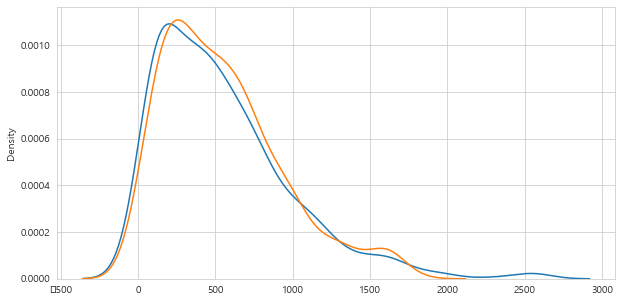

In [148]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )
plt.show()

In [149]:
from sklearn.preprocessing import PolynomialFeatures

In [150]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)

In [151]:
print(f'원본 입력 데이터 shape: {X_train_scaled.shape}')
print(f'2차항 변환 데이터 shape : {X_train_poly.shape}')

원본 입력 데이터 shape: (2361, 9)
2차항 변환 데이터 shape : (2361, 55)


In [152]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [153]:
X_test_poly = poly.fit_transform(X_test_scaled)
r_square = model.score(X_test_poly, y_test)
print(f'결정계수(R-제곱) : {r_square}')

결정계수(R-제곱) : 0.8234890327248627


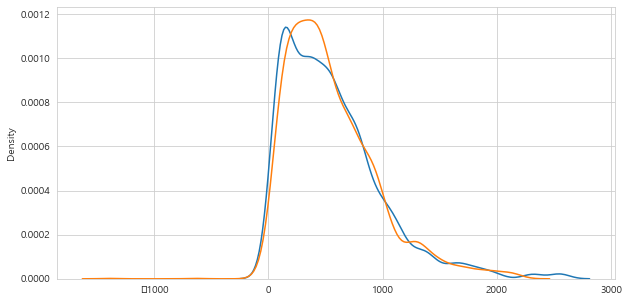

In [154]:
X_scaled= scaler.transform(X)
X_poly = poly.fit_transform(X_scaled)
y_hat = model.predict(X_poly)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist =False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label = 'y_hat', ax=ax1)
plt.show()

### 주차대수 예측 모델- 카테고리 변수 합쳐서

#### 입력/정답 데이터 분리

In [155]:
X =  parking.drop( ['등록차량수', '단지코드'], axis=1 )
y =  parking['등록차량수']

In [156]:
parking.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,1,3,0,39.72,134,38.0,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,1,3,0,39.72,15,38.0,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,1,3,0,51.93,385,38.0,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,1,3,0,51.93,15,38.0,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,1,3,0,51.93,41,38.0,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


In [157]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (2952, 12)
y shape : (2952,)


#### 학습용/테스트용 데이터 분리

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
        test_size = 0.2, random_state = 1234 )

In [160]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (2361, 12)
y_train shape : (2361,)

X_test shape : (591, 12)
y_test shape : (591,)


#### 입력 데이터 표준화( StandardScaler )

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

In [163]:
print( f'X_train_scaled mean : {X_train_scaled.mean()}' )
print( f'X_train_scaled std : {X_train_scaled.std()}' )
print( f'\nX_test_scaled mean : {X_test_scaled.mean()}' )
print( f'X_test_scaled std : {X_test_scaled.std()}' )

X_train_scaled mean : -3.260290683637337e-18
X_train_scaled std : 1.0

X_test_scaled mean : -0.010807866821639527
X_test_scaled std : 1.0428802121094742


#### 다중 선형 회귀 모델 생성

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
model = LinearRegression()
model.fit( X_train_scaled, y_train )

LinearRegression()

#### 모델 평가

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [167]:
y_predict = model.predict( X_test_scaled )

In [168]:
print( f'다중 선형 회귀 모델 결정 계수 : {model.score( X_test_scaled, y_test ) }' )
print( f'\n다중 선형 회귀 모델 W( Weight )값 : {model.coef_}' )
print( f'다중 선형 회귀 모델 b( bias ) 값 : {model.intercept_}' )

다중 선형 회귀 모델 결정 계수 : 0.7950583189215725

다중 선형 회귀 모델 W( Weight )값 : [-37.66483494  31.76283384  -1.23184129  16.44698193   6.02878205
  -2.43460663 -53.24578973   1.40802617  50.95956899 -17.40425548
  17.80881994 377.08057615]
다중 선형 회귀 모델 b( bias ) 값 : 562.2511647606946


In [169]:
mae = mean_absolute_error( y_test, y_predict )
mse = mean_squared_error( y_test, y_predict )
rmse = np.sqrt( mse )
r2 = r2_score( y_test, y_predict )

In [170]:
print( f'MAE  : {mae:8.5f}' )
print( f'MSE  : {mse:8.5f}' )
print( f'RMSE : {rmse:8.5f}' )
print( f'R^2  : {r2:8.5f}' )

MAE  : 140.99640
MSE  : 39615.27467
RMSE : 199.03586
R^2  :  0.79506


In [171]:
nmae = np.mean( abs( y_predict - y_test ) / y_test ) # nmae 계산

print( f'모델 NMAE: {nmae}' ) # 예측치와 실제값의 오차율

모델 NMAE: 0.4367380700174979


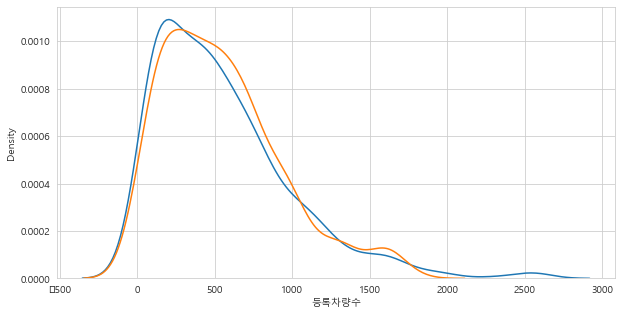

In [172]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )
plt.show()

In [173]:
from sklearn.preprocessing import PolynomialFeatures

In [174]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)

In [175]:
print(f'원본 입력 데이터 shape: {X_train_scaled.shape}')
print(f'2차항 변환 데이터 shape : {X_train_poly.shape}')

원본 입력 데이터 shape: (2361, 12)
2차항 변환 데이터 shape : (2361, 91)


In [176]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [177]:
X_test_poly = poly.fit_transform(X_test_scaled)
r_square = model.score(X_test_poly, y_test)
print(f'결정계수(R-제곱) : {r_square}')

결정계수(R-제곱) : 0.8731670569754918


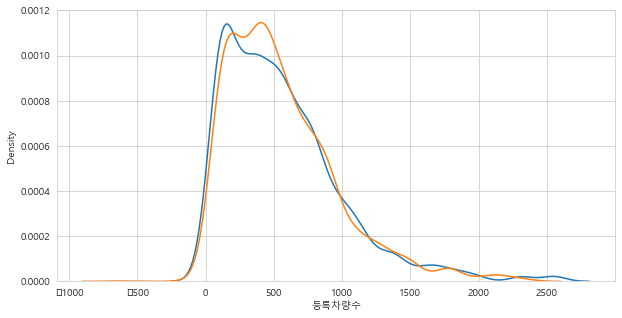

In [178]:
X_scaled= scaler.transform(X)
X_poly = poly.fit_transform(X_scaled)
y_hat = model.predict(X_poly)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist =False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label = 'y_hat', ax=ax1)
plt.show()

### 회귀 모델 검증 생성

In [179]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# 교차 검증 수행 함수
def cross_validation( model, X_train, y_train, n_splits = 5 ):
    splitter = KFold( n_splits = n_splits, shuffle = True, random_state = 42 )
    scores = cross_validate( model, X_train, y_train, cv = splitter )
    
    return scores[ 'test_score' ]

In [180]:
# 교차 검증 수행 함수 호출 및 검증 평균 출력 함수
def run_cross_validation( model, X_train, y_train,  prn_option = 1, folds = [ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ] ):    
    mean_score_list = []
    ret_value = None
    
    for i, fold in enumerate( folds ):
        scores = cross_validation( model, X_train, y_train, fold )
        mean_score_list.append( np.mean( scores ) )
        if prn_option:
            print( f'{fold:3} fold 교차 검증 평균 : {mean_score_list[ i ]:10.5f}' )

    mean_score_array = np.array( mean_score_list )
    if prn_option:
        print( f'\n가장 높은 검증 평균 : {np.max( mean_score_array ):10.5f}( {folds[ mean_score_array.argmax() ]}회 검증 폴드 )' )
    else:
        ret_value = ( max( mean_score_array ), folds[ mean_score_array.argmax() ] )
        
    return ret_value

In [181]:
from sklearn.model_selection import GridSearchCV

# 최적 하이퍼파라미터 검색 함수
def optimal_parameter( model, X_train, y_train, parameters, cv = 5, scoring = 'accuracy' ):
    optimal_model = GridSearchCV( model, param_grid = parameters, 
                        scoring = scoring, cv = cv )
    optimal_model.fit( X_train, y_train )

    print( f'GridSearchCV 최적 하이퍼파라미터 : {optimal_model.best_params_}' )
    print( f'GridSearchCV 최고 정확도 : {optimal_model.best_score_:10.5f}' )
    
    return optimal_model

#### Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression

* Logistic Regression 모델 생성 및 검증( 표준화된 feature 적용 )

In [183]:
lr_ss = LogisticRegression()
lr_ss.fit( X_train_scaled, y_train )

LogisticRegression()

In [184]:
print( '*** 표준화를 적용한 경우 Logistic Regression 회귀 모델\n' )
run_cross_validation( lr_ss, X_train_scaled, y_train )

*** 표준화를 적용한 경우 Logistic Regression 회귀 모델

  5 fold 교차 검증 평균 :    0.46336
 10 fold 교차 검증 평균 :    0.48115
 20 fold 교차 검증 평균 :    0.49046
 30 fold 교차 검증 평균 :    0.48920
 40 fold 교차 검증 평균 :    0.49681
 50 fold 교차 검증 평균 :    0.49512
 60 fold 교차 검증 평균 :    0.49638
 70 fold 교차 검증 평균 :    0.49848
 80 fold 교차 검증 평균 :    0.49727
 90 fold 교차 검증 평균 :    0.49677
100 fold 교차 검증 평균 :    0.49433

가장 높은 검증 평균 :    0.49848( 70회 검증 폴드 )


* Logistic Regression 모델 하이퍼파라미터 튜닝

In [185]:
print( f'Logistic Regression 기본 하이퍼파라미터 : \n{lr_ss.get_params()}' )

Logistic Regression 기본 하이퍼파라미터 : 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [186]:
parameters = { 'C': [ 1, 5, 10, 20, 50, 100 ],
               'max_iter': [ 10, 50, 100, 150, 200 ] }

optimal_lr = optimal_parameter( lr_ss, X_train_scaled, y_train, parameters )

GridSearchCV 최적 하이퍼파라미터 : {'C': 100, 'max_iter': 150}
GridSearchCV 최고 정확도 :    0.77889


* Logistic Regression 모델 검증

In [187]:
from sklearn.metrics import accuracy_score

In [188]:
lr_predictions = optimal_lr.predict( X_test_scaled )
lr_accuracy = accuracy_score( y_test, lr_predictions )
print( f'테스트 데이터에 대한 Logistic Regression 모델 정확도 : {lr_accuracy:10.5f}' )

테스트 데이터에 대한 Logistic Regression 모델 정확도 :    0.80711
